In [88]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

'''
DATA COLELCTION (DATASET FROM KAGGLE)
'''

data = pd.read_csv('fuel.csv')

data.drop_duplicates(inplace=True)

data['year'] = data['year'].astype(int)
#data['engine_index'] = data['engine_index'].astype(str)

In [89]:
'''
REMOVE IRRELEVANT COLUMNS
'''
columns_to_drop = [
    'city_electricity_consumption', 'highway_electricity_consumption', 'combined_electricity_consumption',
    'city_utility_factor', 'highway_utility_factor', 'combined_utility_factor', 'electric_motor',
    'gasoline_electricity_blended_cd', 'vehicle_charger', 'alternate_charger', 'hours_to_charge_120v',
    'hours_to_charge_240v', 'hours_to_charge_ac_240v', 'alternative_fuel_technology', 'city_gasoline_consumption_cd', 'highway_gasoline_consumption_cd',
    'fuel_type_2', 'annual_consumption_in_barrels_ft2', 'tailpipe_co2_ft2',
    'combined_mpg_ft2', 'unrounded_combined_mpg_ft2', 'city_mpg_ft2', 'unrounded_city_mpg_ft2',
    'highway_mpg_ft2', 'unrounded_highway_mpg_ft2', 'my_mpg_data', 'range_ft2', 'city_range_ft2',
    'highway_range_ft2','x2d_passenger_volume', 'x2d_luggage_volume', 'x4d_passenger_volume',
    'x4d_luggage_volume', 'hatchback_passenger_volume', 'hatchback_luggage_volume', 'fuel_type_1',
    'unrounded_city_mpg_ft1', 'unrounded_highway_mpg_ft1', 'unrounded_combined_mpg_ft1',
    'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2', 'annual_fuel_cost_ft2',
    'ghg_score_alt_fuel', 'composite_city_mpg', 'composite_highway_mpg', 'composite_combined_mpg',
       'range_ft1', 'city_range_ft1', 'highway_range_ft1', 'save_or_spend_5_year', 'annual_consumption_in_barrels_ft1',
    'engine_index', 'tailpipe_co2_ft1', 'vehicle_id', 'city_mpg_ft1',
     'highway_mpg_ft1', 'unadjusted_city_mpg_ft1',
       'unadjusted_highway_mpg_ft1',  'tailpipe_co2_in_grams_mile_ft2', 'ghg_score', 'tailpipe_co2_in_grams_mile_ft1',
    'annual_fuel_cost_ft1', 'combined_gasoline_consumption_cd', 'combined_mpg_ft1'
]
# Drop the above columns as well as low variance columns
data.drop(columns=columns_to_drop, inplace=True)
low_variance_cols = [col for col in data.columns if data[col].nunique() <= 1]
data.drop(columns=low_variance_cols, inplace=True)


In [90]:
'''
WE ARE LOOKING AT ONLY GAS CARS
'''
non_fuel_vehicle_types = ['Electricity', 'Regular Gas and Electricity', 'Premium Gas or Electricity']

# Filter out non-fuel vehicles
fuel_vehicles = data[~data['fuel_type'].isin(non_fuel_vehicle_types)]


In [91]:
%%capture
'''
ANALYSIS AND VISUALISATION
'''

Number of rows with valid fuel economy scores: 5989

Class vs. Fuel Economy Score:
                                        mean       std  count
class                                                        
Compact Cars                        6.243469  1.593092    957
Large Cars                          4.683468  1.384842    496
Midsize Cars                        6.007392  1.764385    947
Midsize Station Wagons              5.933333  1.779836     30
Minicompact Cars                    5.381481  1.465473    270
Minivan - 2WD                       4.879310  0.532376     58
Minivan - 4WD                       4.000000  0.000000      5
Small Pickup Trucks 2WD             4.600000  0.643086     60
Small Pickup Trucks 4WD             4.040816  0.610982     49
Small Sport Utility Vehicle 2WD     5.582915  0.898871    398
Small Sport Utility Vehicle 4WD     5.161597  0.984900    526
Small Station Wagons                6.378947  1.240233    190
Special Purpose Vehicle 2WD         4.573333  1.2

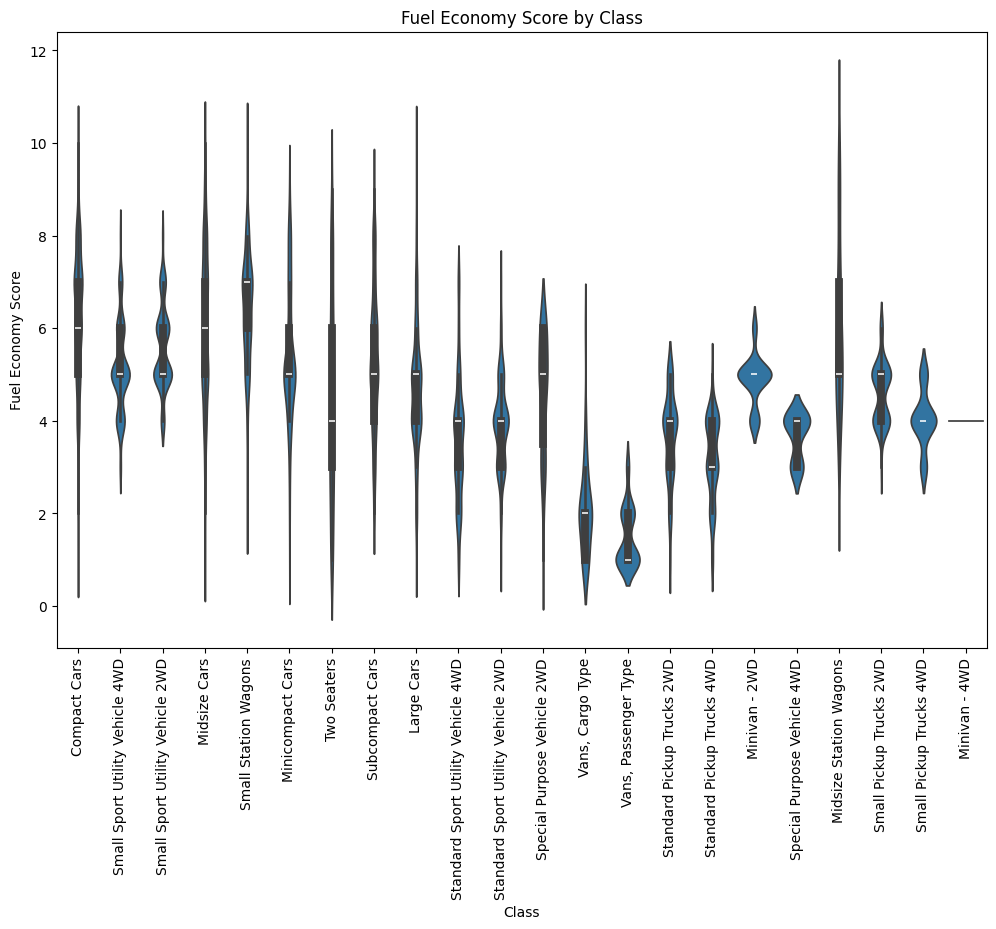


Transmission vs. Fuel Economy Score:
                                      mean       std  count
transmission                                               
Auto(AM-S6)                       6.294118  1.242343     85
Auto(AM-S7)                       4.406130  1.463597    261
Auto(AM-S8)                       7.166667  0.752773      6
Auto(AM-S9)                       4.000000       NaN      1
Auto(AM5)                         8.666667  0.516398      6
Auto(AM6)                         7.602740  1.681102     73
Auto(AM7)                         3.713287  2.212711    143
Auto(AM8)                         7.000000  0.000000      2
Auto(AV-S6)                       6.909910  1.108230    111
Auto(AV-S7)                       6.826667  1.223346     75
Auto(AV-S8)                       6.192308  1.132051     26
Automatic (S10)                   3.500000  0.925820      8
Automatic (S4)                    5.800000  0.447214      5
Automatic (S5)                    5.045455  1.328656     44
Au

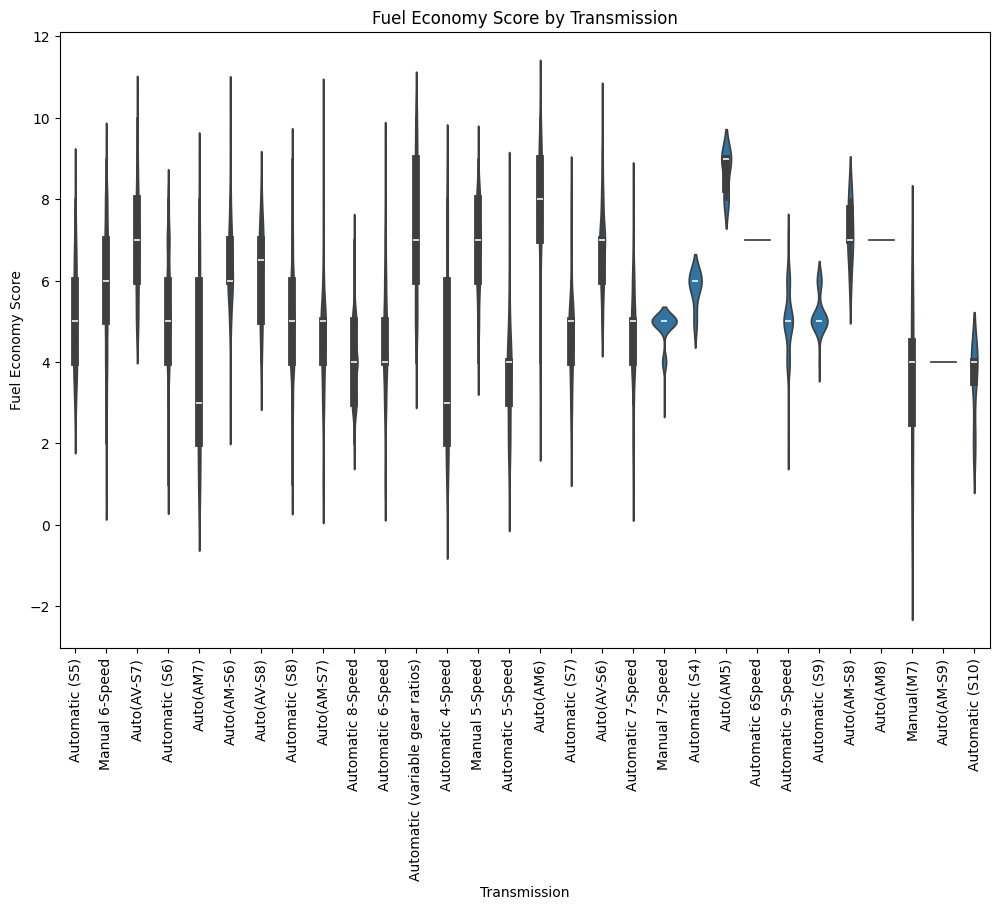


Drive vs. Fuel Economy Score:
                             mean       std  count
drive                                             
4-Wheel Drive            4.235736  1.297765    666
All-Wheel Drive          4.869657  1.344501   1427
Front-Wheel Drive        6.621554  1.333406   1995
Part-time 4-Wheel Drive  2.960938  1.037884    128
Rear-Wheel Drive         4.256063  1.543161   1773


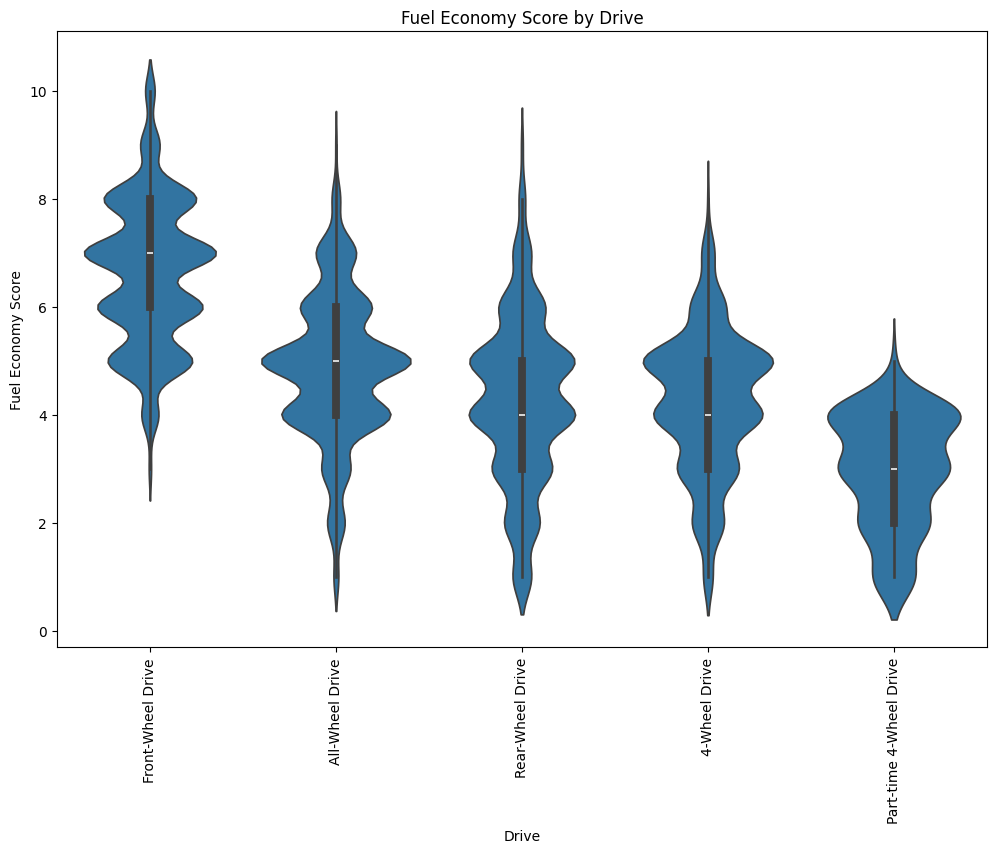


Fuel_type vs. Fuel Economy Score:
                                 mean       std  count
fuel_type                                             
CNG                          6.250000  3.500000      4
Diesel                       7.000000  1.258736     78
Gasoline or E85              3.931818  1.530223    440
Gasoline or natural gas      4.500000  0.707107      2
Midgrade                     3.491803  0.673868     61
Premium                      4.804315  1.635677   2642
Premium and Electricity      7.520000  1.686219     25
Premium or E85               4.662921  1.347926     89
Regular                      5.693878  1.707322   2646
Regular Gas or Electricity  10.000000  0.000000      2


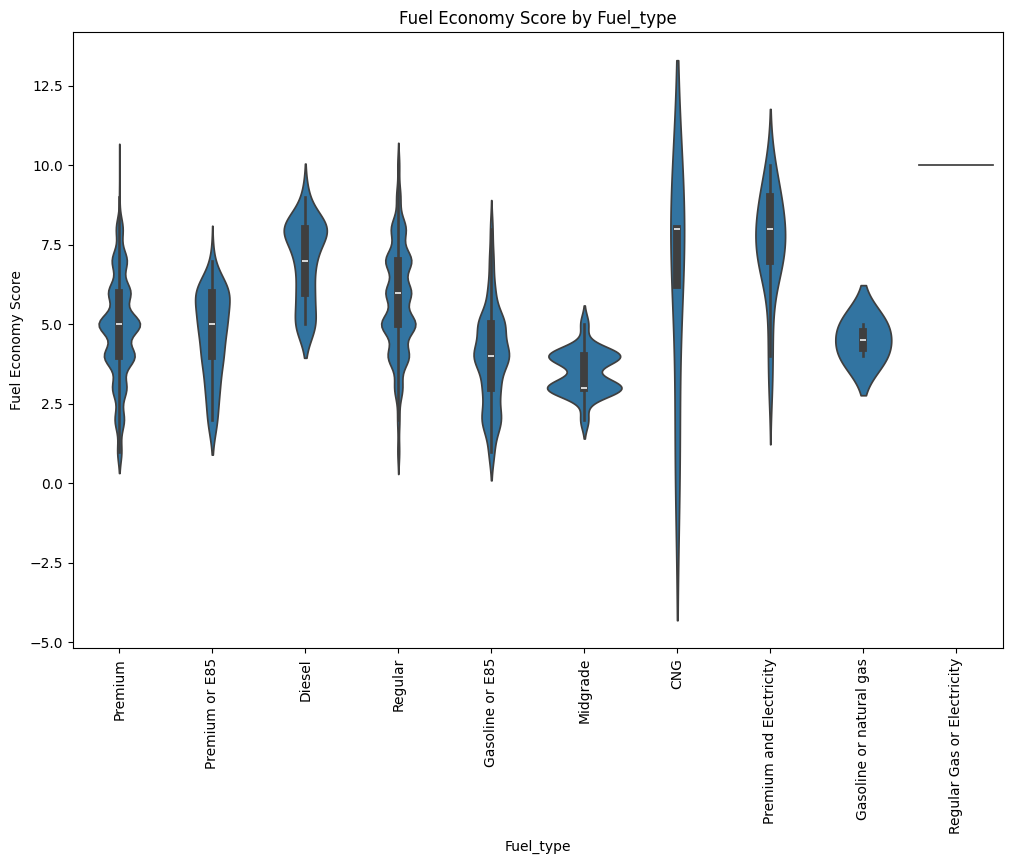

In [92]:
valid_fuel_vehicles = fuel_vehicles[fuel_vehicles['fuel_economy_score'] != -1]
print(f"Number of rows with valid fuel economy scores: {valid_fuel_vehicles.shape[0]}")

def analyze_and_plot(variable):
    # descriptive statistics
    stats = valid_fuel_vehicles.groupby(variable)['fuel_economy_score'].agg(['mean', 'std', 'count'])
    print(f"\n{variable.capitalize()} vs. Fuel Economy Score:")
    print(stats)

    # Violin plots
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=variable, y='fuel_economy_score', data=valid_fuel_vehicles)
    plt.title(f'Fuel Economy Score by {variable.capitalize()}')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.xlabel(variable.capitalize())
    plt.ylabel('Fuel Economy Score')
    plt.show()

analyze_and_plot('class')

analyze_and_plot('transmission')

analyze_and_plot('drive')

analyze_and_plot('fuel_type')

                                 class  fuel_economy_score  \
31993                     Compact Cars                   7   
31994                     Compact Cars                   6   
31995                     Compact Cars                   9   
31996  Small Sport Utility Vehicle 4WD                   4   
31997  Small Sport Utility Vehicle 2WD                   6   

       standardized_FE_score  
31993               0.474882  
31994              -0.152828  
31995               1.730303  
31996              -1.179407  
31997               0.464010  


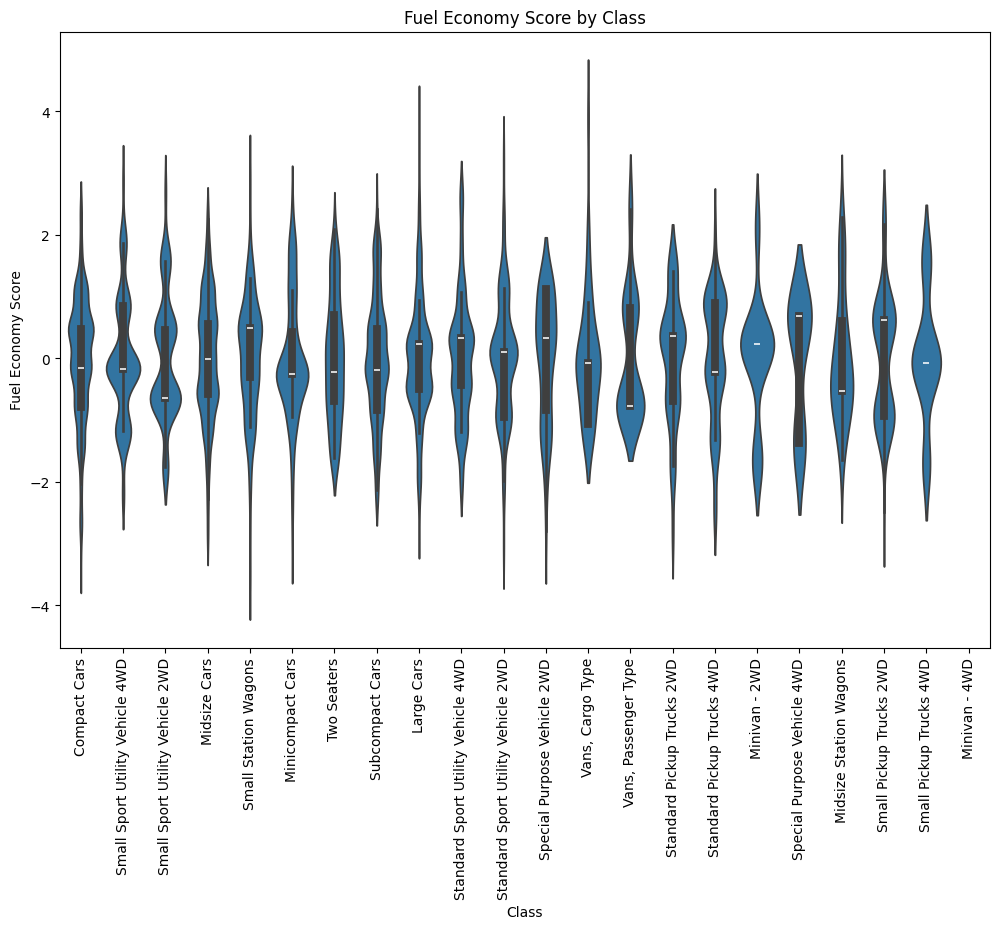

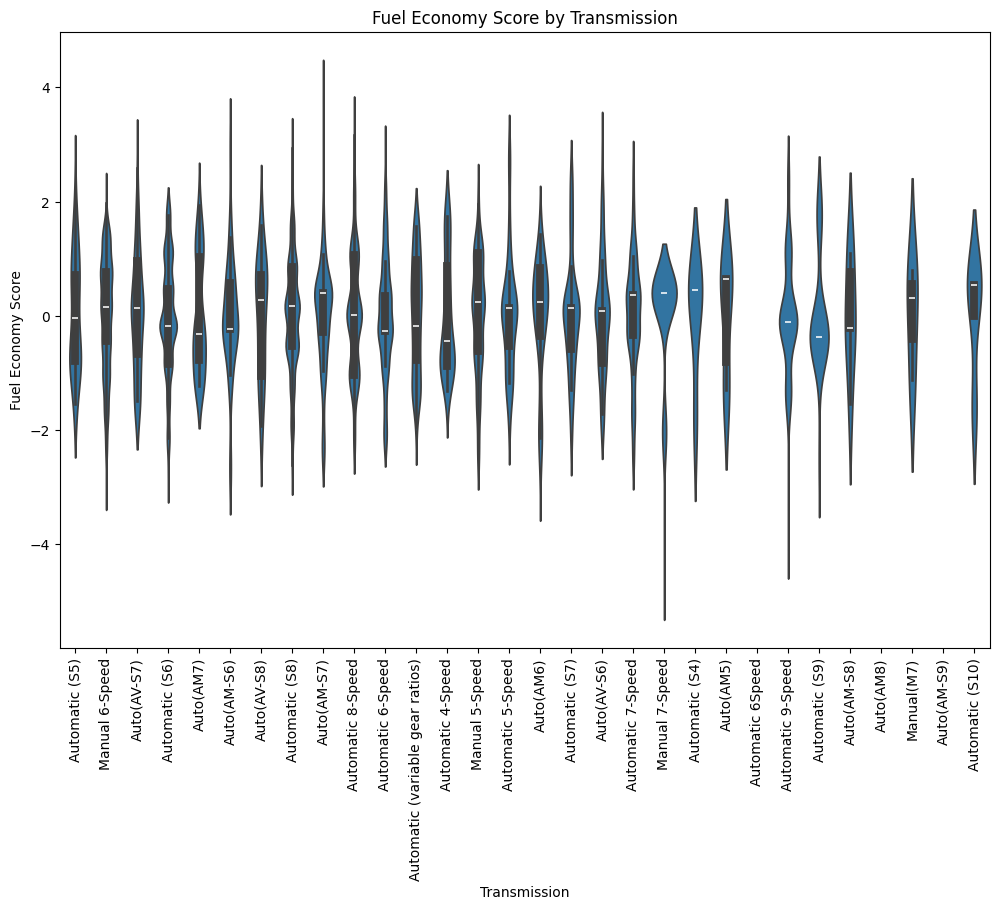

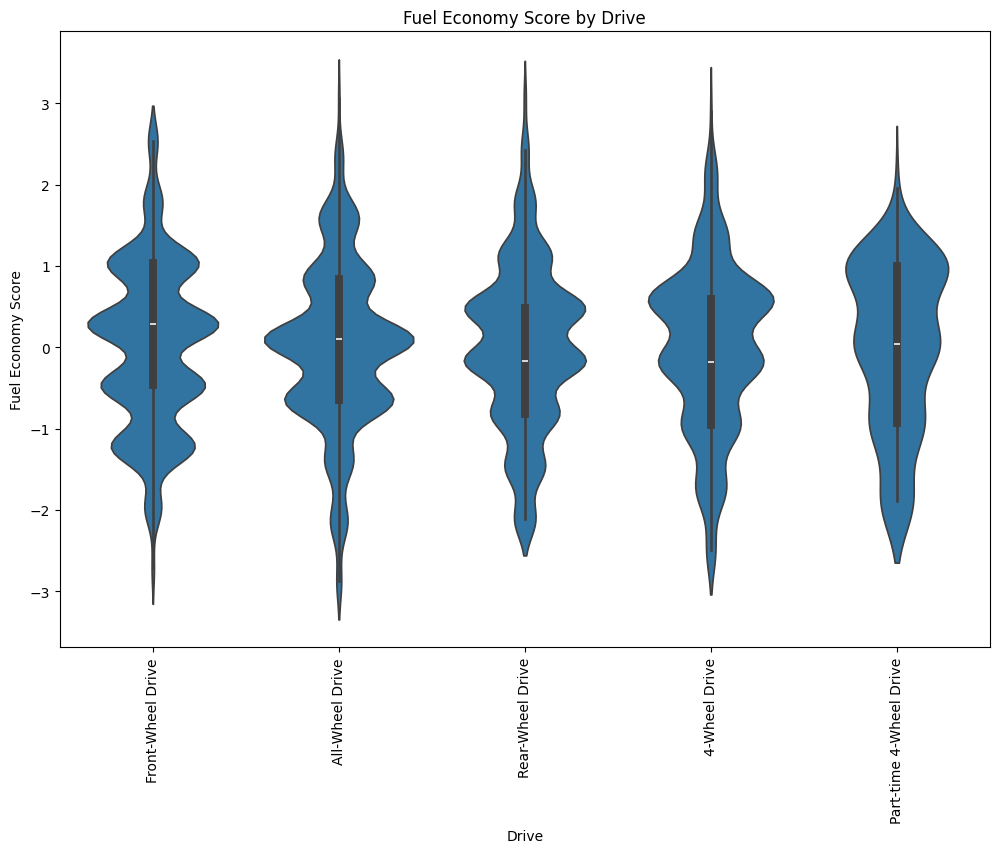

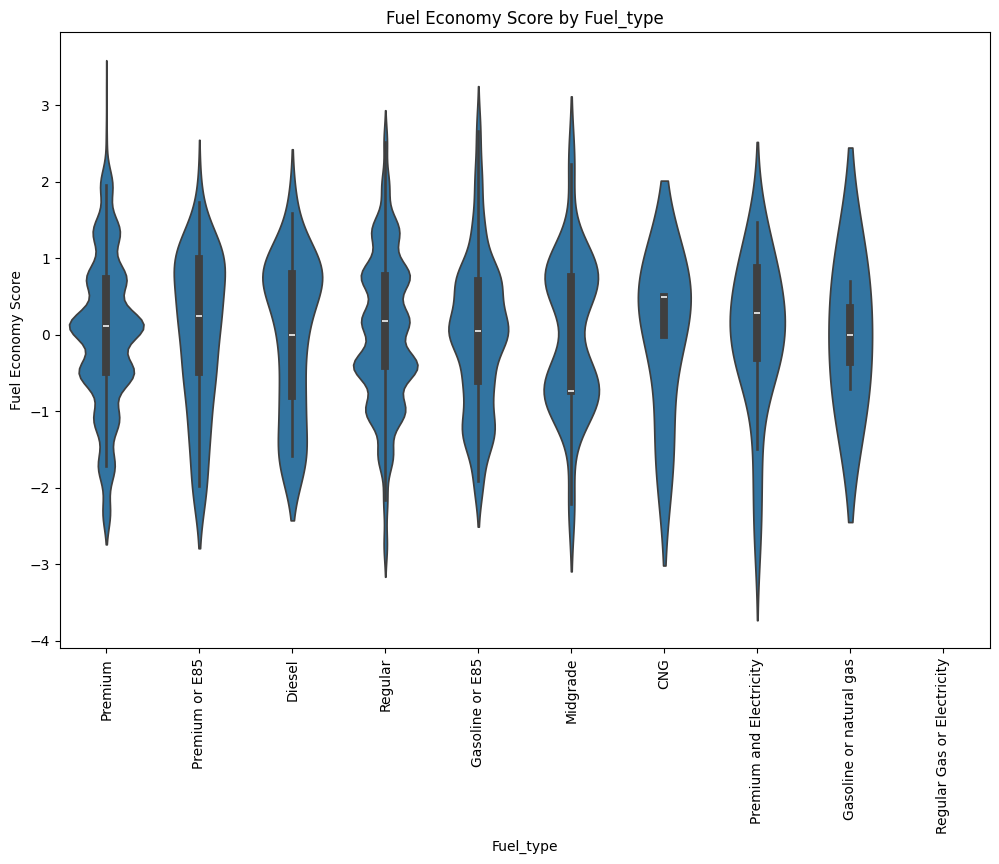

In [93]:
'''normalzing data'''

def standardize_by_category(df, var):
  df_copy = df[[var, 'fuel_economy_score']].copy()
  means = df_copy.groupby(var)['fuel_economy_score'].transform('mean')
  stds = df_copy.groupby(var)['fuel_economy_score'].transform('std')
  df_copy[f'standardized_FE_score'] = df_copy.groupby(var)['fuel_economy_score'].transform(lambda x: (x - x.mean()) / x.std())
  return df_copy
  '''df_copy['standardized_fuel_economy_score'] = (df_copy['fuel_economy_score'] - means) / stds
  return df_copy'''

standard_class = standardize_by_category(valid_fuel_vehicles, 'class')
standard_transmission = standardize_by_category(valid_fuel_vehicles, 'transmission')
standard_drive = standardize_by_category(valid_fuel_vehicles, 'drive')
standard_fuel_type = standardize_by_category(valid_fuel_vehicles, 'fuel_type')

print(standard_class.head())

def plot_standardized(df, var):
  plt.figure(figsize=(12, 8))
  sns.violinplot(x=var, y='standardized_FE_score', data=df)
  plt.title(f'Fuel Economy Score by {var.capitalize()}')
  plt.xticks(rotation=90)
  plt.xlabel(var.capitalize())
  plt.ylabel('Fuel Economy Score')
  plt.show()


plot_standardized(standard_class, 'class')
plot_standardized(standard_transmission, 'transmission')
plot_standardized(standard_drive, 'drive')
plot_standardized(standard_fuel_type, 'fuel_type')

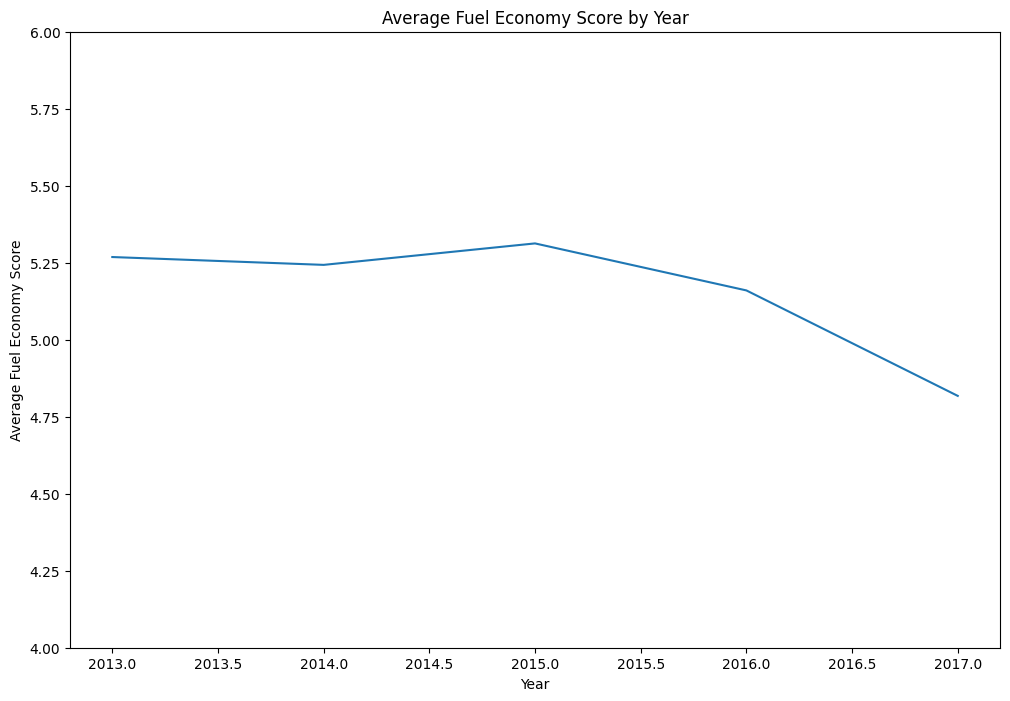

In [94]:

# Calculate average fuel economy by year
avg_fuel_economy_by_year = valid_fuel_vehicles.groupby('year')['fuel_economy_score'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_fuel_economy_by_year, x='year', y='fuel_economy_score')
plt.title('Average Fuel Economy Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Fuel Economy Score')
plt.ylim(4, 6)
plt.show()



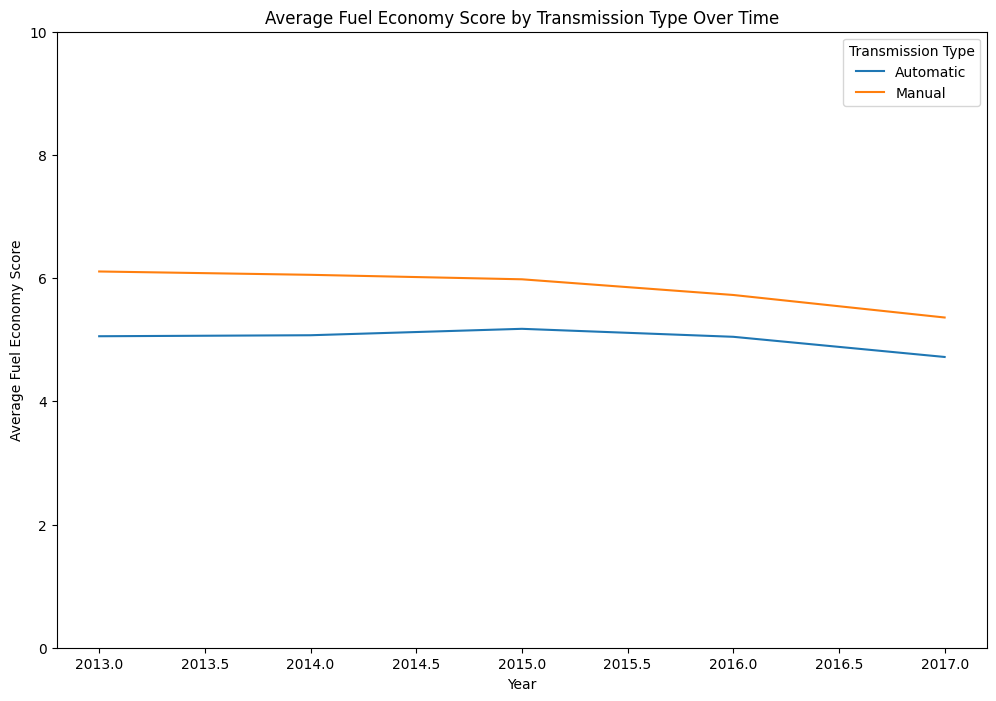

In [95]:
# Combine transmission categories
valid_fuel_vehicles.loc[:, 'transmission'] = valid_fuel_vehicles['transmission'].str.lower()
valid_fuel_vehicles.loc[:, 'transmission'] = valid_fuel_vehicles['transmission'].replace({
    r'auto.*': 'Automatic',
    r'.*manual.*': 'Manual'
}, regex=True)

avg_fuel_economy_by_trans_year = valid_fuel_vehicles.groupby(['year', 'transmission'])['fuel_economy_score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_fuel_economy_by_trans_year, x='year', y='fuel_economy_score', hue='transmission')
plt.title('Average Fuel Economy Score by Transmission Type Over Time')
plt.xlabel('Year')
plt.ylabel('Average Fuel Economy Score')
plt.ylim(0, 10)
plt.legend(title='Transmission Type')
plt.show()

In [96]:
%%capture
'''



SyntaxError: incomplete input (<ipython-input-96-274e8c16e365>, line 1)

<Figure size 1200x800 with 0 Axes>

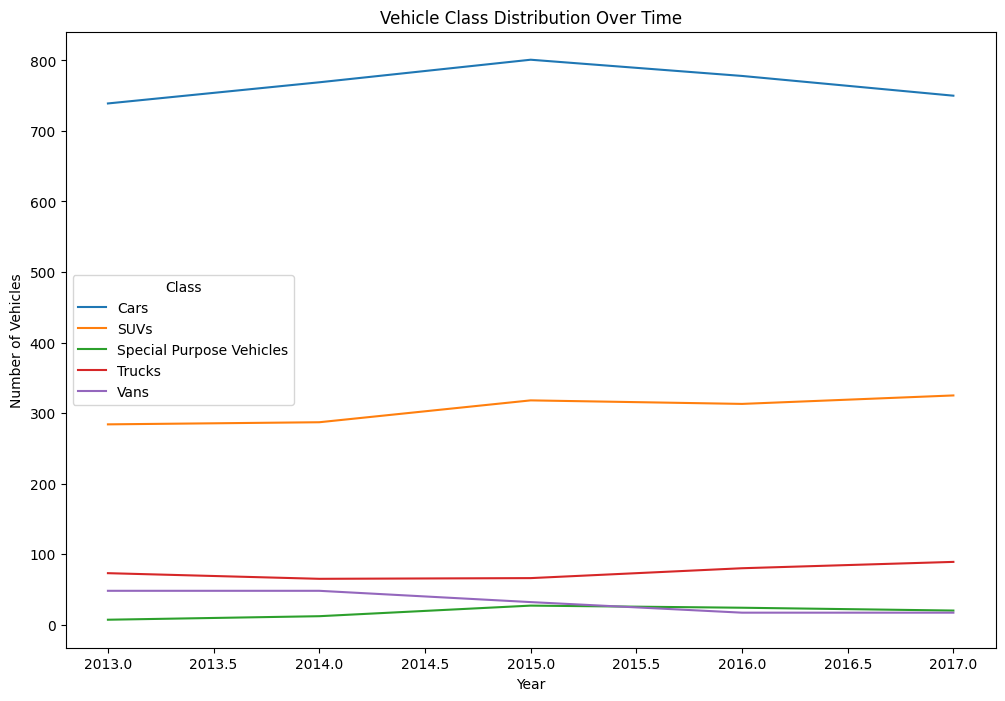

In [97]:
# Combine vehicle classes
class_replacements = {
    'Compact Cars': 'Cars',
    'Large Cars': 'Cars',
    'Midsize Cars': 'Cars',
    'Subcompact Cars': 'Cars',
    'Two Seaters': 'Cars',
    'Small Station Wagons': 'Cars',
    'Midsize Station Wagons': 'Cars',
    'Minicompact Cars': 'Cars',
    'Minivan - 2WD': 'Vans',
    'Minivan - 4WD': 'Vans',
    'Vans, Cargo Type': 'Vans',
    'Vans, Passenger Type': 'Vans',
    'Small Sport Utility Vehicle 2WD': 'SUVs',
    'Small Sport Utility Vehicle 4WD': 'SUVs',
    'Standard Sport Utility Vehicle 2WD': 'SUVs',
    'Standard Sport Utility Vehicle 4WD': 'SUVs',
    'Standard Pickup Trucks 2WD': 'Trucks',
    'Standard Pickup Trucks 4WD': 'Trucks',
    'Small Pickup Trucks 2WD': 'Trucks',
    'Small Pickup Trucks 4WD': 'Trucks',
    'Special Purpose Vehicle 2WD': 'Special Purpose Vehicles',
    'Special Purpose Vehicle 4WD': 'Special Purpose Vehicles'
}
valid_fuel_vehicles.loc[:, 'class'] = valid_fuel_vehicles['class'].replace(class_replacements)

vehicle_class_distribution = valid_fuel_vehicles.groupby(['year', 'class']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
vehicle_class_distribution.plot(kind='line', figsize=(12, 8))
plt.title('Vehicle Class Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Class')
plt.show()

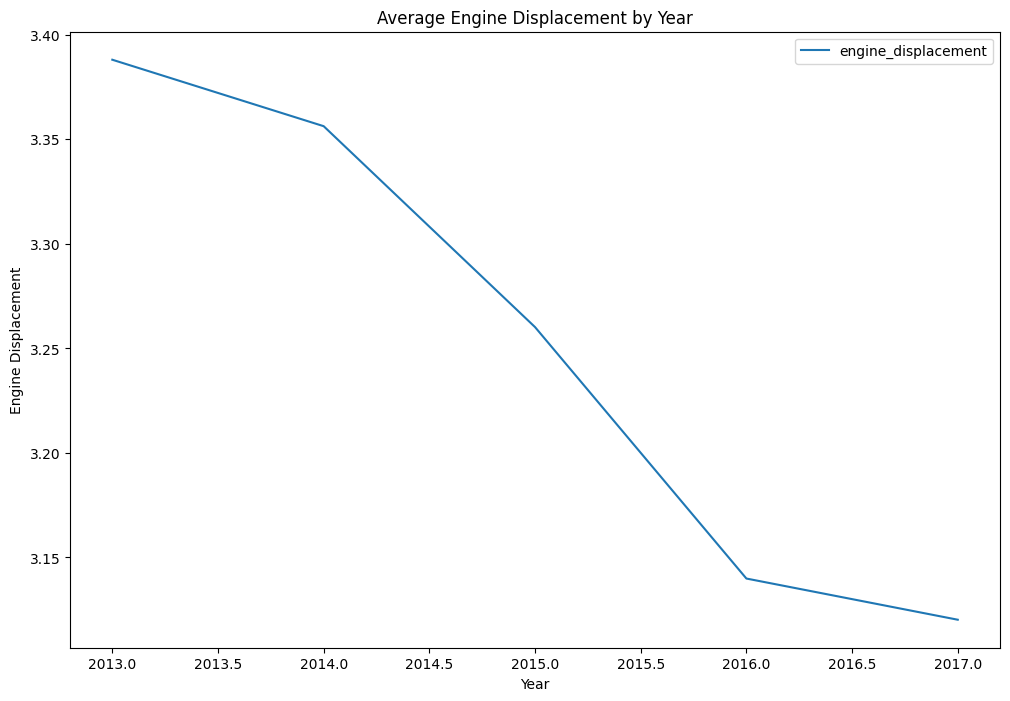

In [98]:
#AVG ENGINE DISPLAVEMENT BY YEAR, lower engine displacement can be associated with better fuel economy

avg_engine_displacement_by_year = valid_fuel_vehicles.groupby('year')['engine_displacement'].mean().reset_index()
avg_engine_displacement_by_year.plot(kind='line', x='year', y='engine_displacement', figsize=(12, 8))
plt.title('Average Engine Displacement by Year')
plt.xlabel('Year')
plt.ylabel('Engine Displacement')
plt.show()

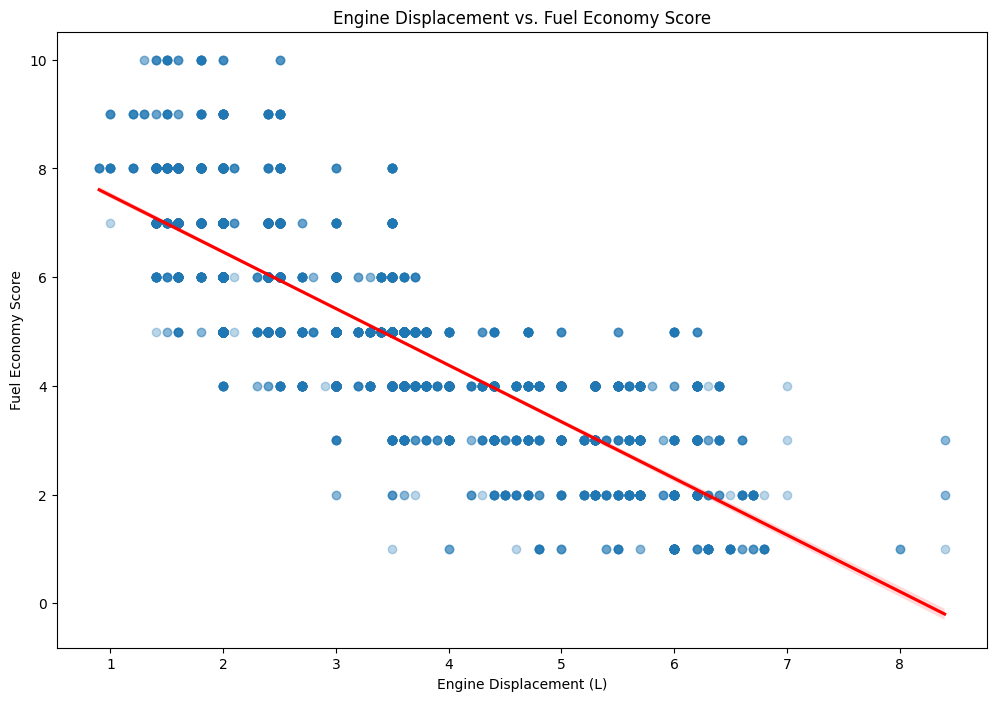

In [99]:
# Scatter plot of engine displacement vs. fuel economy score
plt.figure(figsize=(12, 8))
sns.regplot(x='engine_displacement', y='fuel_economy_score', data=valid_fuel_vehicles, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Engine Displacement vs. Fuel Economy Score')
plt.xlabel('Engine Displacement (L)')
plt.ylabel('Fuel Economy Score')
plt.show()

In [100]:
'''
ML
'''

valid_fuel_vehicles.loc[:, 'class'] = valid_fuel_vehicles['class'].replace(class_replacements)

features = ['year', 'make', 'model', 'class', 'drive', 'transmission', 'engine_cylinders', 'engine_displacement']
target = 'fuel_economy_score'

X = valid_fuel_vehicles[features]
y = valid_fuel_vehicles[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_original = X_test.copy()

numeric_features = ['year', 'engine_cylinders', 'engine_displacement']
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# one hot encoding categorical features
categorical_features = ['make', 'model', 'class', 'drive', 'transmission']
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

X_train_processed = np.hstack((X_train_numeric, X_train_categorical.toarray()))
X_test_processed = np.hstack((X_test_numeric, X_test_categorical.toarray()))

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train_processed, y_train)

y_pred = sgd_regressor.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5387260733177642
R^2 Score: 0.8206003081027947


In [101]:
results = pd.DataFrame({
    'Actual': y_test,
    'PREDICTED': y_pred
})

results = pd.concat([results.reset_index(drop=True), X_test_original.reset_index(drop=True)], axis=1)
print(results.head())

   Actual  PREDICTED  year        make                  model class  \
0       7   6.349146  2015        MINI  Cooper S Paceman All4  Cars   
1       4   4.325904  2015  Land Rover            Range Rover  SUVs   
2       3   2.850913  2014  Land Rover      Range Rover Sport  SUVs   
3       5   5.143573  2017     Porsche        911 Targa 4 GTS  Cars   
4       5   5.199509  2015     Porsche            911 Targa 4  Cars   

             drive transmission  engine_cylinders  engine_displacement  
0  All-Wheel Drive       Manual               4.0                  1.6  
1    4-Wheel Drive    Automatic               6.0                  3.0  
2    4-Wheel Drive    Automatic               8.0                  5.0  
3    4-Wheel Drive    Automatic               6.0                  3.0  
4    4-Wheel Drive    Automatic               6.0                  3.4  
